# <span style="color:red"> Lezione 08 </span>
## <span style="color:green"> Esercizio 08.1 </span>

Fissati i valori di $\mu$ e $\sigma$, ho implementato un algoritmo che calcola il valore medio dell'hamiltoniana $\langle {\hat H} \rangle$. Ho fatto il calcolo usando la formula:
$$H(x) = \frac{1}{2 \Psi_{\sigma,\mu}(x)}\frac{\partial^2\Psi_{\sigma,\mu}(x)}{\partial^2 x} + V(x) ,$$
dove $\Psi_{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$ è la funzione d'onda e $V(x)$ è il potenziale. Ovviamente, per calcolare $\langle {\hat H} \rangle_T$ partendo da $H(x)$ è necessario integrare. 
Per questo integrale ho implementato un algoritmo di Metropolis che muove la posizione $x$ alla quale viene valutato l'integrale tramite la relazione
$x_{new} = x_{old} \cdot \frac{1}{2} \mathcal{U}(-1,1)$, dove $\mathcal{U}(-1,1)$ rappresenta una distribuzione di probabilità uniforme da -1 a 1. Per calcolare l'acceptance rate $\alpha$ di una mossa ho usato:
$$\alpha = \min \bigg(1,\frac{|\Psi_{\sigma,\mu}(x_{new})|^2}{|\Psi_{\sigma,\mu}(x_{old})|^2} \bigg)$$

Tramite $10^5$ step (divisi in 100 blocchi) di questo procedimento ho scritto il codice per calcolare il valore di $\langle {\hat H} \rangle$ fissati i parametri $\sigma$ e $\mu$. All'inizio di questo procedimento, prima di calcolare media ed errore, ho fatto $10^5$ step "a vuoto" in modo da assicurarmi di aver raggiunto i punto a probabilità più alta prima di iniziare a calcolare i valori di interesse.

## <span style="color:green"> Esercizio 08.2 </span>

Per trovare i valori ottimali di $\sigma$ e $\mu$ che minimizzano $\langle {\hat H} \rangle$ ho implementato un codice di simulated annealing. Per questo procedimento ho usato come legge per determinare la "temperatura" di ogni blocco $\beta = i$, dove $i$ è il numero progressivo del blocco. All'interno di ogni blocco ho iterato $10^5$ volte l'algoritmo descritto per l'esercizio 08.1 per le due coppie di parametri $\big( \sigma_{old},\mu_{old} \big)$ e $\big( \sigma_{new}, \mu_{new} \big)$. I parametri $\big( \sigma_{new}, \mu_{new} \big)$ sono stati generati tramite la formula:
$$\mu_{new} = \mu_{old} \cdot \frac{1}{10}\mathcal{U}(-1,1)$$
$$\sigma_{new} = \sigma_{old} \cdot \frac{1}{10}\mathcal{U}(-1,1)$$

Ho quindi usato i parametri "old" per calcolare $\langle {\hat H_{old}} \rangle$ e i parametri "new" per il calcolo di $\langle {\hat H_{new}} \rangle$. L'accettazione $\alpha$ dei parametri "new" è determinata dalla formula:
$$\alpha = \min\bigg(1, e^{-\beta \big(\langle {\hat H_{new}} \rangle - \langle {\hat H_{old}} \rangle \big)}\bigg ).$$
Per ognuno di questi step, ho salvato i valori di $\sigma$ e $\mu$ che danno il valore minimo di $\langle {\hat H} \rangle$ tra tutti quelli calcolati in ogni blocco, in modo da ottenere $H_0$. 
Ho quindi ripetuto questo algoritmo per 100 blocchi, ognuno dei quali con una $\beta$ determinata dalla legge indicata sopra.

Possiamo quindi vedere come questa legge scelta per $\beta$ fa vedere diminuire il valor medio di $\langle {\hat H} \rangle$ all'interno del blocco.

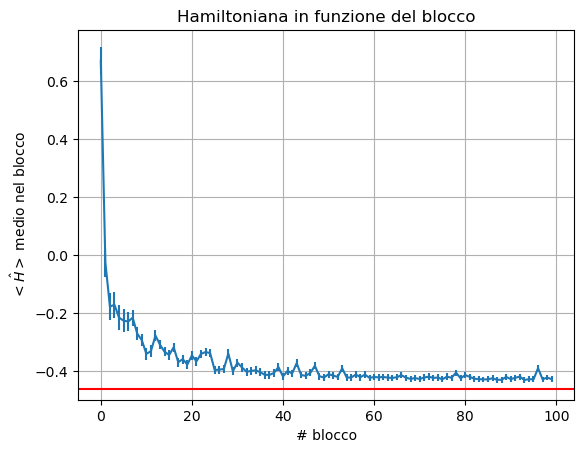

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from astropy.table import Table

def read (nomefile):
    Names = np.array(["mean_ann","errs_ann"])
    datas = Table.read(nomefile,format="ascii",names=Names)

    mean_ann=np.array(datas["mean_ann"])
    errs_ann=np.array(datas["errs_ann"])

    N = len(mean_ann)
    x = np.arange(N)

    plt.errorbar(x,mean_ann,yerr=errs_ann)
    plt.title("Hamiltoniana in funzione del blocco")
    plt.ylabel("$<\hat H >$ medio nel blocco")
    plt.xlabel("# blocco")
    plt.axhline(-0.46046587969271563,color="r") #valore di E_0 calcolato nelle consegne
    plt.grid(True)
    plt.show()

read("AnnRes.txt")

In questo caso risulta evidente la diminuzione del valore medio dell'hamiltoniana con l'aumentare del parametro $\beta$ di annealing. Notiamo inoltre che con l'avvicinarsi ad $E_0$ del valor medio dell'hamiltoniana la curva diventa quasi piatta. Questo è atteso in quanto $\langle {\hat H} \rangle \geq E_0$.

Sotto, invece ho rappresentato i risultati ottenuti fissando $\mu$ e $\sigma$ in modo da ottenere il valore minimo possibile per $\langle {\hat H} \rangle$. Questa quindi è la migliore stima che il mio codice ha dato per $E_0$.

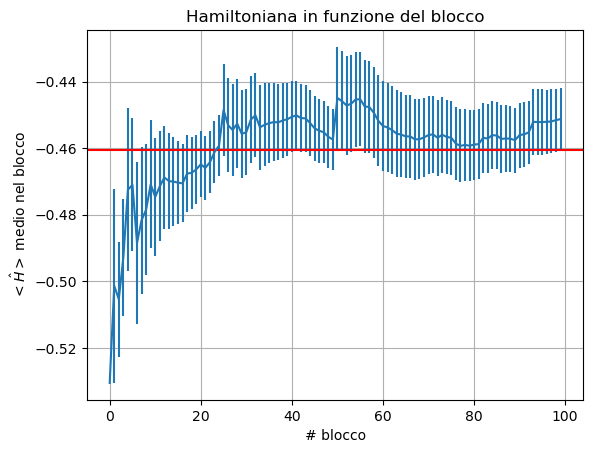

In [4]:
read("Results.txt")

Il codice ha funzionato correttamente in quanto ho ottenuto un risultato compatibile con $E_0$. Si noti che in questo caso i blocchi considerati sono i blocchi del caso precedente, calcolati con $\beta$ diversi ma sono i blocchi dell'algoritmo esposto nell'esercizio 08.1.

Sotto ho messo a confronto la forma teorica di $|\Psi_0(x)|^2$ con quella usata dal mio algoritmo tramite campionamento Monte Carlo.

Ground state energy:  -0.46046587969271563


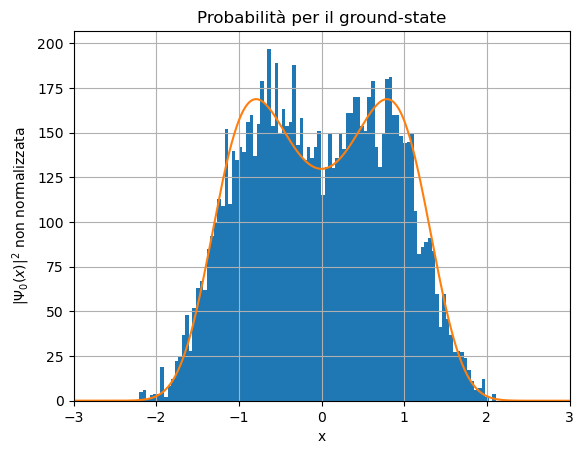

In [10]:
Names = np.array(["values"])
datas = Table.read("Histo_psi.txt",format="ascii",names=Names)

values=np.array(datas["values"])

def Vpot(x):
    return (x**2 - 2.5)*x**2
hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
# Plot a few things

N,bins,_ =plt.hist(values,bins=100)
constant = (bins[1]-bins[0])*sum(N)
plt.plot(x,((psi[0])**2)*constant)
plt.title("Probabilità per il ground-state")
plt.xlabel("x")
plt.ylabel("$|\Psi_0(x)|^2$ non normalizzata")
plt.grid(True)
plt.xlim((-3,3))
plt.show()

Ho ottenuto una forma funzionale simile a quella teorica, a meno di deviazioni dovute all'incertezza statistica.